# Introduction to machine learning
## Luis Manuel García Muñoz (lmanuel.garciam@gmail.com)

## What is machine learning? 
Citing [Wikipedia](https://en.wikipedia.org/wiki/Machine_learning): Machine learning (ML) is the scientific study of algorithms and statistical models that computer systems use to effectively perform a specific task without using explicit instructions, relying on patterns and inference instead. 

## Types of learning algorithmics
 * Supervised learning: Try to predict Y (numerical or categorical) form X (numerical or categorical)
 * Unsupervised learning: Split my data into clusters.
 * Reinforcement learning: Interaction between agent and environment to maximize reward.
 
## Machine learning vs statistics
 
Char | Statistics | Machine learning
--- |:---:|:---:
**Amount of data** | reduced | large
**Model asumptions** | strong | weak
**Model complexity** | low | very high
**Comp. burden** | low | very high
**Focus** | Statistical significance | Accuracy

We import the necessary packages.

In [48]:
# Plotting library
import matplotlib.pyplot as plt
plt.style.use('default') # Plots will be displayed in default style   
# Numeric library
import numpy as np

# Data analysis library
import pandas as pd

# To read zip files
import zipfile

# To clear outputs
from IPython.display import clear_output

# To print HTML
from IPython.display import HTML

# To use 3D plotting library (plotly): 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)


def enable_plotly_in_cell():
  import IPython
  from plotly.offline import init_notebook_mode
  display(IPython.core.display.HTML('''<script src="/static/components/requirejs/require.js"></script>'''))
  init_notebook_mode(connected=False)
  


In [49]:
# To make files in google drive accesible from Google Colab

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# Files are located in PATH
PATH = 'drive/My Drive/Machine Learning Course/Linear Regression/'

# To be able to import python files
import sys
sys.path.insert(0, PATH)

In [0]:
from plot_image import plot_image 

# Linear regression

Assumes a linear relationship between the variable we want to predict $Y$ and the independent variables (features) $X$. If $X$ is one dimensional:

$$Y=\beta_0+\beta_1X+\epsilon$$

Where $\epsilon$ is the error term we want to minimize, $\beta_0$ is called the intercept (also called bias term).

If $X$ is multidimensional, then the equation followed by $Y$ is:

$$Y = \beta_0+\sum_{j}\beta_jX_j+\epsilon=\beta_0+\underbrace{\beta^T}_{1\times m}\underbrace{X}_{m\times 1}+\epsilon$$

Given the linear relationship, $Y \in \mathbb{R}$, but $X$ does not have to.

Let's explore the relationship between IBM share price returns and those of the S&P500 index:

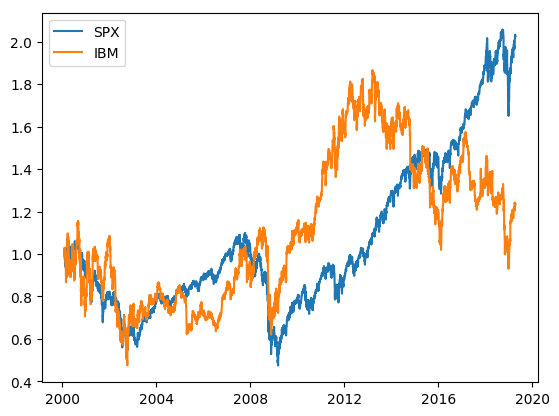

In [52]:
# We read the file
mkt_data = pd.read_excel(PATH + 'MktData.xlsx', index_col = 'Date')

# We normalize the time series so that we can compare them.
mkt_data.SPX = mkt_data.SPX/mkt_data.SPX[0] 
mkt_data.IBM = mkt_data.IBM/mkt_data.IBM[0]

# We plot both time series
plt.plot(mkt_data.index, mkt_data.SPX, label = 'SPX')
plt.plot(mkt_data.index, mkt_data.IBM, label = 'IBM')

plt.legend();

There seems to be some relationship between the 2 series in the $2000-2012$ period. Let's represent the returns of both time series in that period.

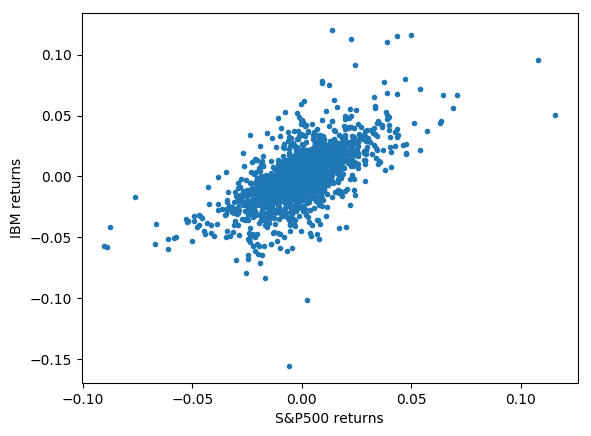

In [53]:
# We do a scatter plot of the one day returns of the 2 series in the 2000-2012 period

plt.plot(mkt_data.SPX.loc['2000':'2012'].pct_change(), mkt_data.IBM.loc['2000':'2012'].pct_change(), '.')

plt.xlabel('S&P500 returns')

plt.ylabel('IBM returns');

## Estimating linear regression coefficients

Let's assume we have $n$ samples and $m-1$ features. We augment the features with a feature $X_0 = 1$, so that we include the bias term. We have the following

$\mathbf{Y}: (n\times 1)$: Variable we want to predict

$\mathbf{\tilde{Y}}: (n\times 1)$: Estimate of $Y$ given $X$ 

$\mathbf{X}: (n\times m)$: Features

$\mathbf{\beta}: (m\times 1)$ Model coefficients

$$\mathbf{\tilde{Y}} = \mathbf{X}\mathbf{\beta}$$

The mean square error is given by

$$\epsilon^2=\frac{1}{n}\sum_{j=1}^n\left(y_j-\tilde{y}_j\right)^2=\frac{1}{n}\left(\mathbf{Y}-\mathbf{X}\mathbf{\beta}\right)^T\left(\mathbf{Y}-\mathbf{X}\mathbf{\beta}\right)$$

If we derive the last equation with respect to $\beta$

$$\frac{\partial{\epsilon^2}}{\partial\beta}=\frac{2}{n}\mathbf{X}^T\left(\mathbf{Y}-\mathbf{X}\mathbf{\beta}\right)$$

And setting it equal to $0$ we obtain the value of $\beta$ that minimizes the mean square error:

$$\beta^*=\left(\mathbf{X}^T\mathbf{X}\right)^{-1}\mathbf{X}^T\mathbf{Y}$$

This equation is called the **normal equation**.

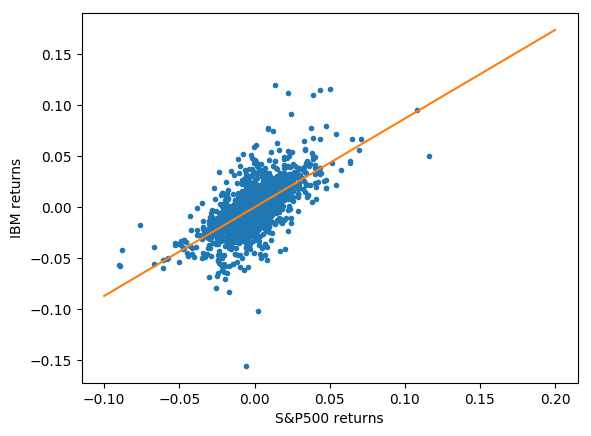

In [54]:
# X is equal to the one day return of the SP time series
X = np.array(mkt_data.SPX.loc['2000':'2012'].pct_change()[1:]).reshape(-1,1)

# We add a column of 1s to X (will help us to obtain intercept)
X = np.concatenate((np.ones((X.shape[0],1)),X), axis = 1)

# Y is equal to the one day return of the IBM time series
Y = np.array(mkt_data.IBM.loc['2000':'2012'].pct_change()[1:]).reshape(-1,1)

# We obtain the model params using the normal equation
beta = np.matmul(np.linalg.inv(np.matmul(X.T,X)),np.matmul(X.T,Y))

# In order to obtain a prediction of our model, we generate a grid in X
X_pred = np.linspace(-0.10, 0.2).reshape(-1,1)

# We add the column of 1s to the grid
X_pred = np.concatenate((np.ones((X_pred.shape[0],1)),X_pred), axis = 1)

# We plot the true values of X and Y
plt.plot(X[:,1],Y, '.')

# We compute our prediction
Y_pred = np.matmul(X_pred, beta)

# We plot our prediction
plt.plot(X_pred[:,1], Y_pred)

plt.xlabel('S&P500 returns')

plt.ylabel('IBM returns');


In [55]:
print('beta_0: ', beta[0,0])
print('beta_1: ', beta[1,0])

beta_0:  0.0001603411483671315
beta_1:  0.8693657375123763


## Linear regression in scikit-learn

[Scikit-learn](https://scikit-learn.org/stable/) is a machine learning library in Python. Its use is widespread and it is very well documented.

Let's see how to run linear regression in scikit-learn.


In [56]:
# We import Sklearn linear regression model
from sklearn.linear_model import LinearRegression

# X and Y now contain the return of both series
X = np.array(mkt_data.SPX.loc['2000':'2012'].pct_change()[1:]).reshape(-1,1)
Y = np.array(mkt_data.IBM.loc['2000':'2012'].pct_change()[1:]).reshape(-1,1)

# We define our model. fit_intercept=True means that we want the model
# to fit the intercept
model = LinearRegression(fit_intercept=True)

# We fit the model to the data
model.fit(X,Y)

# We print the model parameters
print('beta_0: ', model.intercept_[0])
print('beta_1: ', model.coef_[0,0])

beta_0:  0.00016034114836713137
beta_1:  0.8693657375123746


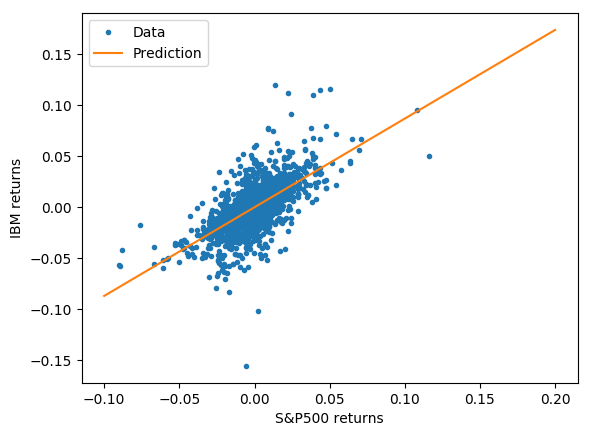

In [57]:
# We define a grid to do a prediction
X_pred = np.linspace(-0.10, 0.2).reshape(-1,1)

# We plot the actual data
plt.plot(X,Y, '.', label = 'Data')

# We obtain the model prediction
Y_pred = model.predict(X_pred)

# We plot the prediction
plt.plot(X_pred, Y_pred, label = 'Prediction')

plt.xlabel('S&P500 returns')

plt.ylabel('IBM returns')

plt.legend();

## Multiple linear regression

Nothing changes when the number of features is multidimensional.

In [0]:
def simulate_mult_regr(num_samples,alpha, beta1, beta2, epsilon, rho):
  
  # Generates X1, X2 pairs randomly (using normal distribution with mean 0 and std dev 1)
  # X1 and X2 are correlated with correlation rho
  # Y is generated as a linear combination of X1 and X2 (with coefficients beta1 and beta2 
  # and intercept alpha) plus noise (also normal) with standard deviation epsilon

  n = num_samples

  # Simulation of X1 and X2
  X1 = np.random.normal(0,1,n)
  X2 = rho*X1 + np.sqrt(1-rho**2)*np.random.normal(0,1,n)

  # Simulation of Y
  Y = alpha + beta1*X1 + beta2*X2 + np.random.normal(0,epsilon,n)

  # X1 and X2 are put together in variable X
  X = np.concatenate((X1.reshape(-1,1), X2.reshape(-1,1)), axis = 1)

  # The model is fitted to X & Y
  model = LinearRegression(fit_intercept=True)

  model.fit(X,Y)

  # The function plots the model parameters
  print('intercept: ', model.intercept_)
  print('beta 1:', model.coef_[0])
  print('beta 2:', model.coef_[1])
  
  # And returns X1, X2, Y and the models in a dictionary
  return {'X1': X1, 'X2': X2, 'Y': Y, 'model': model}


In [0]:
def plot_points_predict(simul_results):
  
  # This funtion does a 3D plot of the results obtained
  # by the previous function. simul_results represents
  # the output dictionary. We will use plotly
  
  
  # We find the minimum and maximum values of X1 & X2
  x1_min = np.min(simul_results['X1'])
  x1_max = np.max(simul_results['X1'])

  x2_min = np.min(simul_results['X2'])
  x2_max = np.max(simul_results['X2'])
  
  # We generate a 2D grid of X1 and X2
  X1_Grid = np.linspace(x1_min, x1_max, 50)
  X2_Grid = np.linspace(x2_min, x2_max, 50)
  X1_Grid, X2_Grid = np.meshgrid(X1_Grid, X2_Grid)

  # We initialize the 2D Y prediction of the model
  Y_Grid = np.zeros((50,50))

  # We iterate over the 2D grid of X1 and X2 and obtain the model
  # prediction
  for i in range(50):
    for j in range(50):
      Y_Grid[i,j] = simul_results['model'].predict([[X1_Grid[i,j], X2_Grid[i,j]]])


  # We create the model prediction plot
  lines = []
  line_marker = dict(color='rgb(50, 50, 255)', width=1)
  for i, j, k in zip(X1_Grid, X2_Grid, Y_Grid):
      lines.append(go.Scatter3d(x=i, y=j, z=k, mode='lines', line=line_marker))
  for i, j, k in zip(X1_Grid.T, X2_Grid.T, Y_Grid.T):
      lines.append(go.Scatter3d(x=i, y=j, z=k, mode='lines', line=line_marker))

  # We create the 3D scatter plot
  trace1 = go.Scatter3d(
        x=simul_results['X1'],
        y=simul_results['X2'],
        z=simul_results['Y'],
        mode='markers',
        marker=dict(
            size=2,
            color=simul_results['Y'], # set color to an array/list of desired values
            colorscale='Portland',   # choose a colorscale
            opacity=1.0
        )
    )

  lines.append(trace1)

  # We define the layout
  layout2 = go.Layout(
                      scene = dict(
                      xaxis = dict(
                          title='X1', color = 'black'),
                      yaxis = dict(
                          title='X2', color = 'black'),
                      zaxis = dict(
                          title='Y', color = 'black'),),
                      width=700,
                      margin=dict(
                      r=20, b=10,
                      l=10, t=10),
                      showlegend=False,
                    )
  
  enable_plotly_in_cell()

  # We do the plot
  fig = go.Figure(data=lines, layout=layout2)
  iplot(fig, filename='elevations-3d-surface')


Notice that our estimates of regression parameters are accurate if the number of samples is high 

In [0]:
results = simulate_mult_regr(num_samples = 5000, alpha = 0.5, beta1 = 0.3, beta2 = -0.3, epsilon = 0.3, rho = 0.5)
plot_points_predict(results)

enable_plotly_in_cell()

Output hidden; open in https://colab.research.google.com to view.

Nevertheless, the model is unstable when the correlation of some of its features is high.

This is due to the fact that $\mathbf{X}^T\mathbf{X}$ is a singular matrix for perfectly correlated variables.

We will explore some techniques to overcome this problem.

In [61]:
results = simulate_mult_regr(num_samples = 5000, alpha = 0.5, beta1 = 0.3, beta2 = -0.3, epsilon = 0.3, rho = 0.9999)
plot_points_predict(results)

Output hidden; open in https://colab.research.google.com to view.

# Linear regression for non linear problems

Sometimes the relationship between $X$ and $Y$ is not linear. 

Can we still use linear regression in these problems?

In the following code cell, we simulate $X$ uniformly in the $[0, 2\pi]$ interval. $Y$ is generated as $\sin(X) + \epsilon \phi$, where $\phi \sim N(0,1)$

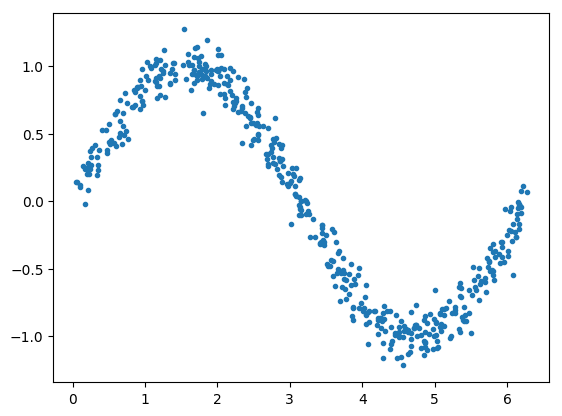

In [62]:
num = 500

X = np.random.uniform(0,2*np.pi, (num,1))

err = 0.1

Y = np.sin(X) + err*np.random.normal(0,1,(num,1))

plt.plot(X,Y, '.');

If we tried to fit a linear model to the data, the model would be highly innacurate.

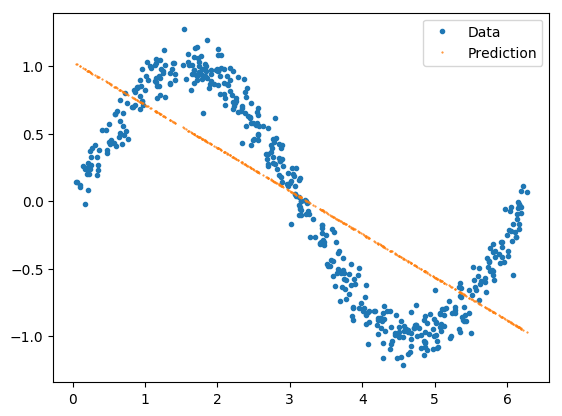

In [63]:
model = LinearRegression(fit_intercept = True)

model.fit(X.reshape(-1,1),Y.reshape(-1,1))

Y_Pred = model.predict(X)

plt.plot(X,Y, '.', label = 'Data')
plt.plot(X,Y_Pred, '.', markersize = 1, label = 'Prediction');

plt.legend();

### Feature scaling

In order to reflect the non linear relationship between $X$ and $Y$, we can use powers of $X$ as independent variables (features).  

A question arises: up to what power should be included?

In the following code we simulate 2 sets of $X,Y$ data: a set that we will use to fit the model parameters and a set used to test the error on data not used to train the model.

* The set used to train the model will be called the **train set**.
* The set used to assess the model accuracy on "unseen" data will be called the test set.

Since we augment the feature space by adding powers of $X$, the different features order of magnitude will be very different from each other and so will be their coefficients. This can produce numerical problems. Therefore, we will **normalize the features**. As we will see, **feature normalization** is a standard practice when using some machine learning algorithms. We will use standar scaling (substract mean and divide by standard deviation).

$$\tilde{x}_j^k=\frac{x_j^k-\bar{x}^k}{\sigma^k}$$

$\tilde{x}_j^k$: normalized j-th example of feature k.
$\bar{x}^k$: sample mean of feature k.
$\sigma^k$: sample std deviation of feature k.

Since it is important that we do not use our test data in training, the **scaling parameters should be obtained in the train data**.

In [0]:
# We import mean square error metric from sklearn
from sklearn.metrics import mean_squared_error

# We import scaler of data
from sklearn.preprocessing import StandardScaler

def sin_error(order, num, err, seed):
  # This function does the following:
  #    * Simulates X uniformly in [0,2\pi] (num represents the number of samples)
  #    * Simulates Y as sin(X) plus noise. Noise is normally distributed with std = err
  #    * Augments X with powers of it up to order
  #    * Fits the linear regression model
  #    * Computes the model prediction for a grid of X
  #    * Plots simulated data (train), together with prediction and true relationship
  #    * Computes error in train and test sets
  # seed represents the random seeds so that we can obtain the same results 
  
  # We set random seed
  if seed != -1:
    np.random.seed(seed)
  
  # Simulate train data
  X_train = np.random.uniform(0,2*np.pi, (num,1))
  Y_train = np.sin(X_train) + err*np.random.normal(0,1,(num,1))

  # Simulate test data
  X_test = np.random.uniform(0,2*np.pi, (num,1))
  Y_test = np.sin(X_test) + err*np.random.normal(0,1,(num,1))

  # Generate grid
  X_grid = np.linspace(0,2*np.pi,500).reshape(-1,1)

  # Initialize variables that will contain augmented data
  X_train_aug = np.zeros((num, order)) 
  X_test_aug = np.zeros((num, order)) 
  X_grid_aug = np.zeros((500, order)) 

  # We fill aug variables with powers of the original data
  for i in range(order):

    X_train_aug[:,i] = np.power(X_train, i+1)[:,0]
    X_test_aug[:,i] = np.power(X_test, i+1)[:,0]
    X_grid_aug[:,i] = np.power(X_grid, i+1)[:,0]
    
  # We declare the standard scaler
  scaler = StandardScaler()
  
  # We fit the scaler to train data (and transform it)
  X_train_aug_scaled = scaler.fit_transform(X_train_aug)
  
  # We transform test and grid features
  X_test_aug_scaled = scaler.transform(X_test_aug)
  X_grid_aug_scaled = scaler.transform(X_grid_aug)
  
  # We fit our model
  model = LinearRegression(fit_intercept=True)
  model.fit(X_train_aug_scaled,Y_train)

  # We predict on the grid data 
  Y_grid_predicted = model.predict(X_grid_aug_scaled)

  # We plot data, prediction and true relationship
  plt.plot(X_train,Y_train, '.', label = 'Data')
  plt.plot(X_grid,Y_grid_predicted,'r', label = 'Model prediction');
  plt.plot(X_grid,np.sin(X_grid),'green', label = 'True relationship')
  
  plt.ylim(-1.2,1.2)
  plt.legend()
  
  # We return train and test errors
  return {'error train' : np.sqrt(mean_squared_error(Y_train, model.predict(X_train_aug_scaled))),
                                'error test' : np.sqrt(mean_squared_error(Y_test, model.predict(X_test_aug_scaled)))}

  

### Bayes error

Notice that when the order is low, the model is innacurate. Notice the high error in both train and test compared with the true error.

The unavoidable error in our data is called **Bayes error** and is a theoretical concept that is unkown in nearly every real problem.

In some applications, the error obtained by humans is used as a proxy for Bayes error.



# Bias - variance



## Bias:

When the order is low (simple model), the model does not depend too much on the data, but the prediction is far away from the true relationship. 

Both error on train and test are far away from Bayes error.

This situation is called bias.

{'error test': 0.5079110061032809, 'error train': 0.5184883825856129}

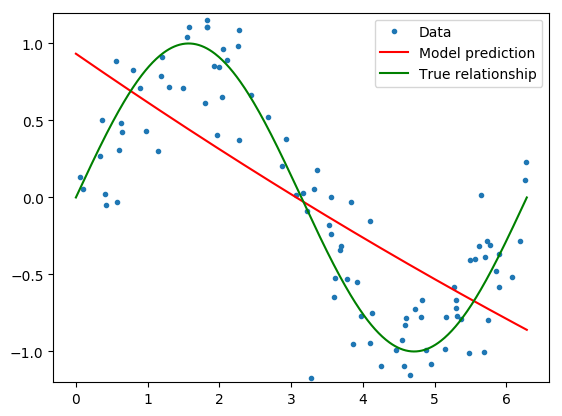

In [65]:
sin_error(order=2, num = 100, err = 0.3, seed = -1)

Under this circumstance, having more data does not help at all.

In this case, adding complexity to our model (more features or a more complex model) could improve the model performance.

{'error test': 0.5436333449016245, 'error train': 0.5344101386661342}

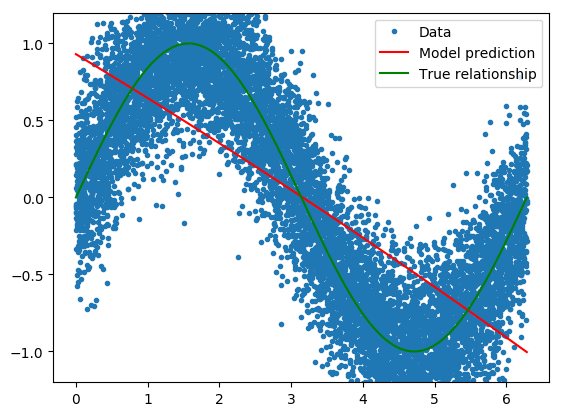

In [66]:
sin_error(order=2, num = 10000, err = 0.3, seed = -1)

## Variance

When the order is high, the model seems unstable. 

Train error is low compared to test error and could be lower than Bayes error. This situation is called variance (overfit)

{'error test': 7.830061237649509, 'error train': 0.24420277657022932}

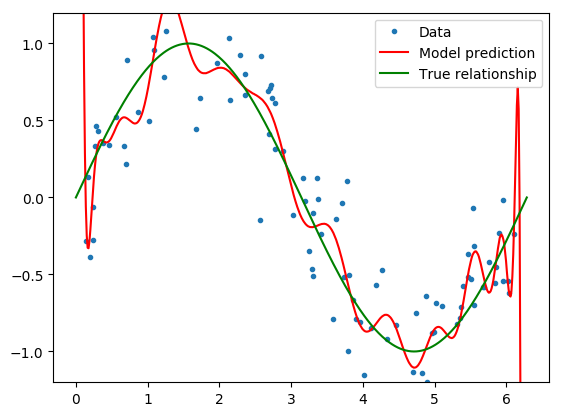

In [69]:
sin_error(order=30, num = 100, err = 0.3, seed = -1)

One solution could be to try a simpler model (less features, simpler model)

{'error test': 0.3277547720442093, 'error train': 0.3151649096345512}

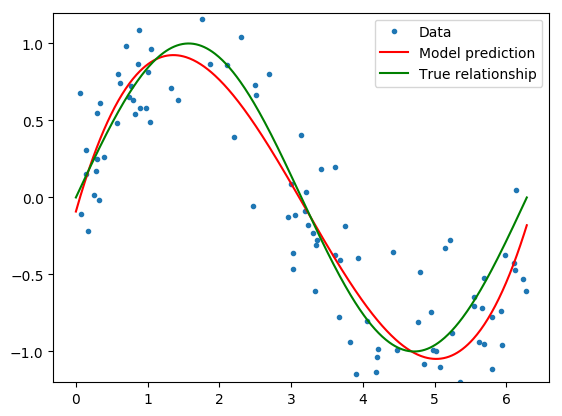

In [70]:
sin_error(order=3, num = 100, err = 0.3, seed = -1)

Or to get more data

{'error test': 0.30281674744770276, 'error train': 0.2983367640369154}

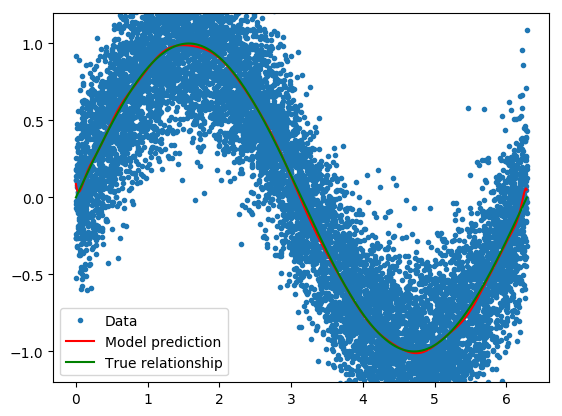

In [71]:
sin_error(order=30, num = 10000, err = 0.3, seed = -1)

## Bias-variance tradeoff

Simple models tend to suffer from bias (not reflect the true relationship) and complex models tend to suffer from variance (overfit to training data and not generalize properly to unseen data).

Notice that whether a model suffers from variance or bias depend on:

* **The problem being analyzed**
* **The model being used**
* **The amount of data available**

## Transformers, estimators and pipelines in sklearn

In the problem we are working on, we are doing the following:

* We augment the raw input X to include its powers (**transform**).
* We normalize these powers (**transform**).
* We fit a multivariate linear regression (**estimator**).

That is, we do (in sequence) two transformations and one estimation. Notice that the first transformation step has a model hyperparameter (order of polynomial).

In sklearn we have built in [transformers](https://scikit-learn.org/stable/modules/preprocessing.html).

If we want to use a sequence of transformers and a final model as if it was a single model, we can use [pipelines](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html). As we will see, this will save us a lot of code.


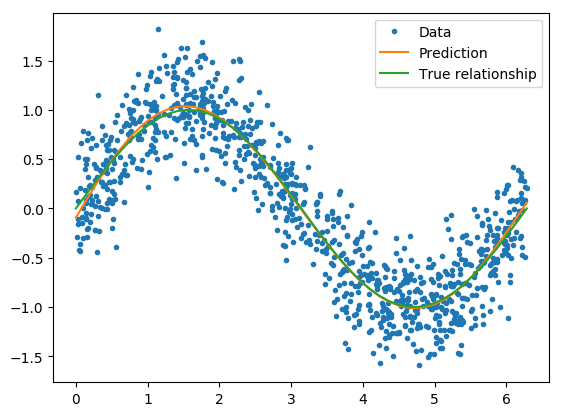

In [72]:
# To chain transformers and estimator
from sklearn.pipeline import Pipeline

# PolynomialFeatures will compute the powers of X
from sklearn.preprocessing import PolynomialFeatures

# Number of samples
num = 1000 
# error
err = 0.3
# Random number generator seed
seed = -1
# Degree of polynomial regression
degree = 5

# Set random seed
if seed != -1:
  np.random.seed(seed)

# Simulate the data
X = np.random.uniform(0,2*np.pi, (num,1))
Y = np.sin(X) + err*np.random.normal(0,1,(num,1))

# We define the steps as a dictionary 
steps = [('Transfor_X_to_Powers', PolynomialFeatures(degree=degree)),('scaler', StandardScaler()), 
           ('Regression', LinearRegression(fit_intercept=True))]

# Pipeline is defined
pipeline = Pipeline(steps)

# We use the pipeline as if it was a standard model
pipeline.fit(X,Y)

# Grid of X to predict
X_grid = np.linspace(0,2*np.pi,50).reshape(-1,1)

# Plot
plt.plot(X,Y, '.', label = 'Data')
plt.plot(X_grid, pipeline.predict(X_grid), label = 'Prediction')
plt.plot(X_grid, np.sin(X_grid), label = 'True relationship')
plt.legend();

# Cross validation

In most real applications data is scarce. However, we need to find the best model for our data.

## Train, validation, test split

The idea is splitting the data into 3 different sets:

* **Train set**: Will be used to find different model parameters (i.e. linear regression coefficients).
* **Cross-validation set**: Once a model has been fitted to the train set, we will see its performance on the cross validation set. This will help us decide among different models or model hyperparameters (i.e. order of polinomial regression).
* **Test set**: Notice that the model hyperparameters are optimized using the cross validation set, therefore the accurary on the cross validation set of the best model found will be lower that that obtained in data not included in the model selection process. Therefore the test set will be used to assess the model performance (accuracy).

The train set could contain 80% of the data and the cross-validation and test sets 10% of the data each.

Notice that it is very important that the split is done randomly.

If we had both real data and synthetic data (data generated artificially), we should include a portion of real data in train and all synthetic data in train. Cross validation and test should just be comprised of real data.

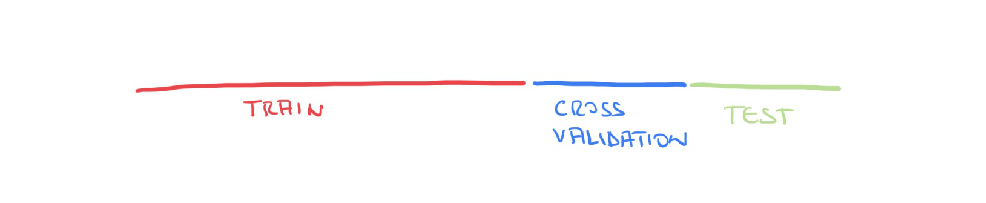

In [0]:
#@title train_test
plot_image(PATH + 'train_valid.jpg', 12, 12)

## Grid search

Given a model (i.e. polynomial regression) and a set of hyperparameters (i.e. degree of polynomial), we define a grid of values for the different hyperparameters.

For each element in the h dimensional grid (h being the number of hyperparameters):
* We find the model parameters using the train set.
* We compute the model performance on the cross validation set.

To compute the model performance, a score must be used. [Sklearn](https://scikit-learn.org/stable/modules/model_evaluation.html) provides us with the most widely used. Customized scores can also be used.

In linear regression, the most typical are $r^2$ and mean squared error.

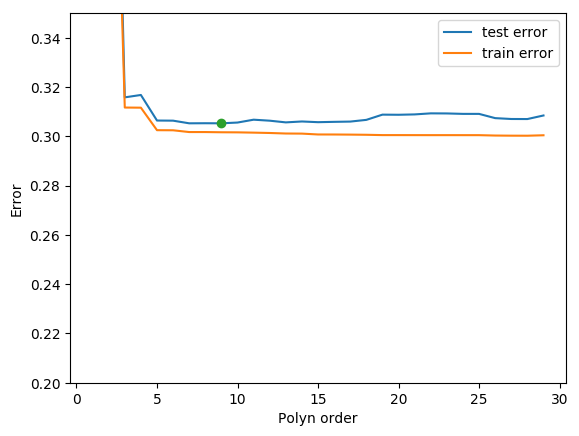

In [0]:
# To force train / cross validation
from sklearn.model_selection import PredefinedSplit

# To perform a grid search
from sklearn.model_selection import GridSearchCV

from sklearn.utils import shuffle


# Number of samples
num = 1000 
# error
err = 0.3
# Random number generator seed
seed = 12345
# Degree of polynomial regression
degree = 5

# Set random seed
if seed != -1:
  np.random.seed(seed)

# Simulate the data
X = np.random.uniform(0,2*np.pi, (num,1))
Y = np.sin(X) + err*np.random.normal(0,1,(num,1))

np.random.seed()
X, Y = shuffle(X,Y)

# We build a vector with the same length as X.
# For each element of X, we indicate to what cross validation set
# we want the element to belong to. If we add a -1 to an element,
# it means that it will not belong to any of them. This is what
# we want to do for the elements to be part of the train set.
test_fold = [(lambda x: 0 if x/len(X) < 0.2 else -1)(x) for x in range(len(X))]
ps = PredefinedSplit(test_fold)


# We define the steps of the pipeline 
steps = [('Transfor_X_to_Powers', PolynomialFeatures()),('scaler', StandardScaler()), 
           ('Regression', LinearRegression(fit_intercept=False))]

# Pipeline is defined
pipeline = Pipeline(steps)


# Grid of hyperparams
parameteres = {'Transfor_X_to_Powers__degree': range(1,30)}

# Grid search is defined
grid = GridSearchCV(pipeline, param_grid=parameteres, cv=ps, verbose = 0, refit=True, scoring= 'neg_mean_squared_error',
                   return_train_score = True)

# We use the grid as if it was a model
grid.fit(X,Y);

# We plot the score bor both train and test
plt.plot(range(1,30), np.sqrt(-grid.cv_results_['mean_test_score']), label = 'test error')
plt.plot(range(1,30), np.sqrt(-grid.cv_results_['mean_train_score']), label = 'train error')

# We plot the best model
plt.plot(grid.best_params_['Transfor_X_to_Powers__degree'], np.sqrt(-grid.best_score_),'o')

plt.xlabel('Polyn order')
plt.ylabel('Error')

plt.legend()

plt.ylim(0.2, 0.35); 


As can be seen in the previous example, the result is quite volatile:

* Optimum hyperparameter is dependent on the data.
* Test error is sometimes smaller than test error.

The result is heavily dependent on the actual test / train split.

## K-fold cross validation

The idea is to divide the data into two sets: train-cross validation and test.

The train-cross validation set is divided in K folds.

We run k fits. On each of these, k-1 folds are used to train and the fold not used to train is used to obtain the model score.

The average score is obtained:

$$\bar{SC}=\frac{1}{k}\sum_{j=1}^kSC_j$$

The best model found is then trained using the train-cross validation set and the model performance on test is used as an estimate of the model error.

Finally, the best model is fitted to all the data available and put in production.

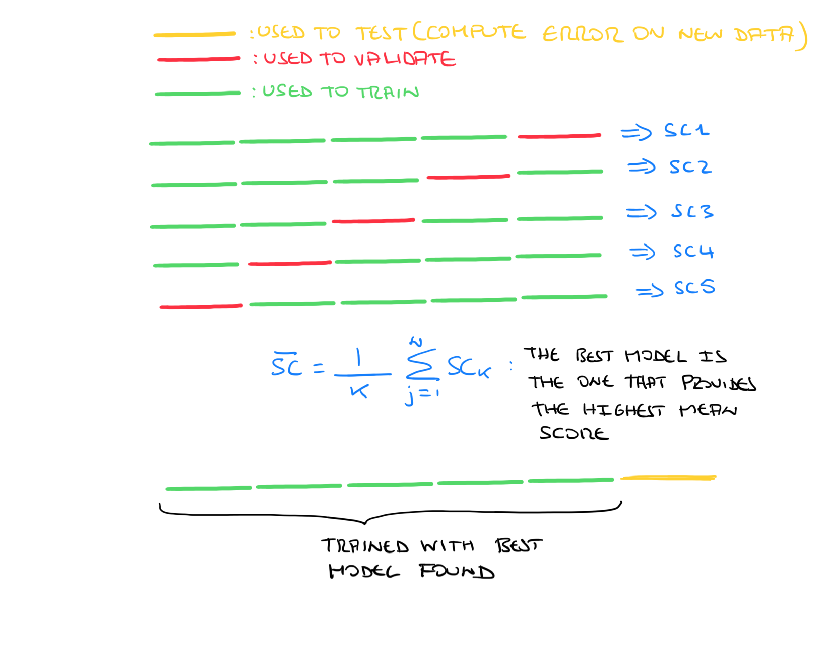

In [0]:
#@title K-Fold
plot_image(PATH + 'k_fold.PNG', 12,8)

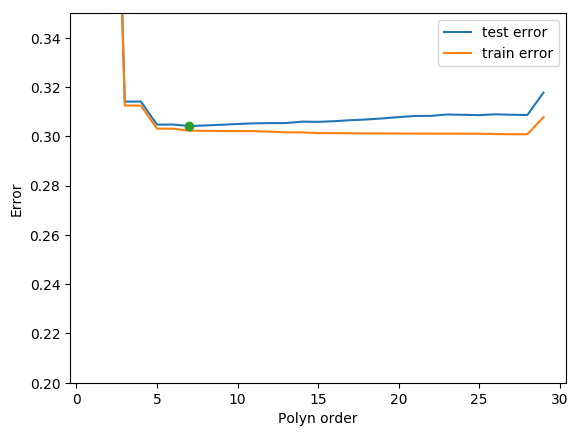

In [0]:

# Number of samples
num = 1000 
# error
err = 0.3
# Random number generator seed
seed = 12345
# Degree of polynomial regression
degree = 5

# Set random seed
if seed != -1:
  np.random.seed(seed)

# Simulate the data
X = np.random.uniform(0,2*np.pi, (num,1))
Y = np.sin(X) + err*np.random.normal(0,1,(num,1))

np.random.seed()
X, Y = shuffle(X,Y)

# We define the steps of the pipeline 
steps = [('Transfor_X_to_Powers', PolynomialFeatures()),('scaler', StandardScaler()), 
           ('Regression', LinearRegression(fit_intercept=False))]

# Pipeline is defined
pipeline = Pipeline(steps)


# Grid of hyperparams
parameteres = {'Transfor_X_to_Powers__degree': range(1,30)}

# Grid search is defined. Here we do 10-fold cv
grid = GridSearchCV(pipeline, param_grid=parameteres, cv=10, verbose = 0, refit=True, scoring= 'neg_mean_squared_error',
                   return_train_score = True)

# We use the grid as if it was a model
grid.fit(X,Y);

# We plot the score bor both train and test
plt.plot(range(1,30), np.sqrt(-grid.cv_results_['mean_test_score']), label = 'test error')
plt.plot(range(1,30), np.sqrt(-grid.cv_results_['mean_train_score']), label = 'train error')

# We plot the best model
plt.plot(grid.best_params_['Transfor_X_to_Powers__degree'], np.sqrt(-grid.best_score_),'o')

plt.xlabel('Polyn order')
plt.ylabel('Error')

plt.legend()

plt.ylim(0.2, 0.35); 


As can be seen in the previous example, the result is less volatile:

* Optimum hyperparameter is less dependent on the data.
* Test error is usually larger than test error.

The result is less dependent on the actual test / train split.

K-fold cross validation is computationally expensive. 5-10 folds are usually chosen.

Leave one out cross validation is a special case of cross validation where k is equal to the number of samples.

# Ridge regression

Ridge regression (also known as regularized linear regression) is similar to least squares, but the cost function is slightly different:


$$J(\beta)=\frac{1}{n}\sum_{j=1}^n\left(y_j-\tilde{y}_j\right)^2 + \frac{\lambda}{n}\sum_{j=1}^p\beta_j^2$$

The term $\frac{\lambda}{n}\sum_{j=1}^p\beta_j^2$ is called regularization term and $\lambda$ the regularization parameter. The intercept (bias term) $\beta_0$ is usually excluded from the regularization term.

The regularization term penalizes large coefficients. If $\lambda \to 0$ leads to standard linear regression, whereas $\lambda \to \infty$ leads to smoother models.

In models with a large number of features  $\lambda \to 0$ leads to **variance** whereas $\lambda \to \infty$ leads to variance.

Same as with linear regression, the model has a closed form formula for its parameters.

The cost function can be written in matrix form:

$$J(\beta)=\frac{1}{n}\left(\mathbf{Y}-\mathbf{X}\mathbf{\beta}\right)^T\left(\mathbf{Y}-\mathbf{X}\mathbf{\beta}\right) + \frac{\lambda}{n}\beta^T\beta$$

So that the gradient of the cost function with respect to $\beta$ is given by

$$\frac{\partial J(\beta)}{\partial \beta} = \frac{2}{n}\left(\mathbf{X}^T\left(Y-X\beta\right)+\lambda\beta\right)$$

And setting the gradient equal to 0, we get the model params:

$$\beta^*=\left(\mathbf{X}^T\mathbf{X}+\Lambda^TI\right)^{-1}\mathbf{X}^T\mathbf{Y}$$

Where $\Lambda$ is a $(m+1)\times 1$ matrix with $\lambda$ in every element but the one corresponding with the bias term, where it holds a $0$.


beta_0:  0.00019473293746679568
beta_1:  0.32263333998837496


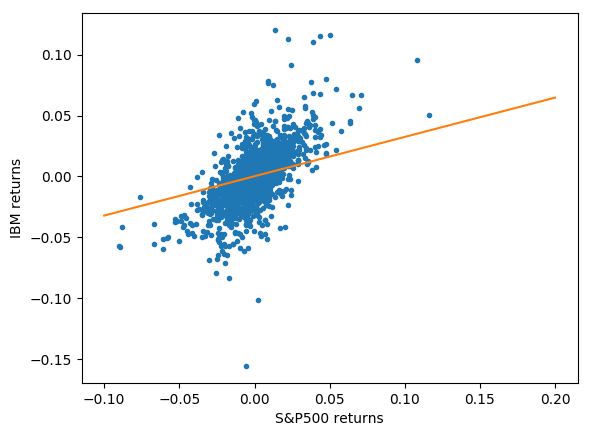

In [0]:
# X is equal to the one day return of the SP time series
X = np.array(mkt_data.SPX.loc['2000':'2012'].pct_change()[1:]).reshape(-1,1)

# We add a column of 1s to X (will help us to obtain intercept)
X = np.concatenate((np.ones((X.shape[0],1)),X), axis = 1)

lamb = 1

I = np.identity(2)
I[0,0] = 0

# Y is equal to the one day return of the IBM time series
Y = np.array(mkt_data.IBM.loc['2000':'2012'].pct_change()[1:]).reshape(-1,1)

# We obtain the model params using the normal equation
beta = np.matmul(np.linalg.inv(np.matmul(X.T,X)+lamb*I),np.matmul(X.T,Y))

# In order to obtain a prediction of our model, we generate a grid in X
X_pred = np.linspace(-0.10, 0.2).reshape(-1,1)

# We add the column of 1s to the grid
X_pred = np.concatenate((np.ones((X_pred.shape[0],1)),X_pred), axis = 1)

# We plot the true values of X and Y
plt.plot(X[:,1],Y, '.')

# We compute our prediction
Y_pred = np.matmul(X_pred, beta)

# We plot our prediction
plt.plot(X_pred[:,1], Y_pred)

plt.xlabel('S&P500 returns')

plt.ylabel('IBM returns');

print('beta_0: ', beta[0,0])
print('beta_1: ', beta[1,0])

## Ridge regression in Scikit-learn

In [0]:
# We import Sklearn linear regression model
from sklearn.linear_model import Ridge

# X and Y now contain the return of both series
X = np.array(mkt_data.SPX.loc['2000':'2012'].pct_change()[1:]).reshape(-1,1)
Y = np.array(mkt_data.IBM.loc['2000':'2012'].pct_change()[1:]).reshape(-1,1)

alpha = 1

# We define our model. fit_intercept=True means that we want the model
# to fit the intercept
model = Ridge(fit_intercept=True, alpha = alpha)

# We fit the model to the data
model.fit(X,Y)

# We print the model parameters
print('beta_0: ', model.intercept_[0])
print('beta_1: ', model.coef_[0,0])

beta_0:  0.00019473293746679547
beta_1:  0.322633339988375


## Cross validation with Scikit-learn

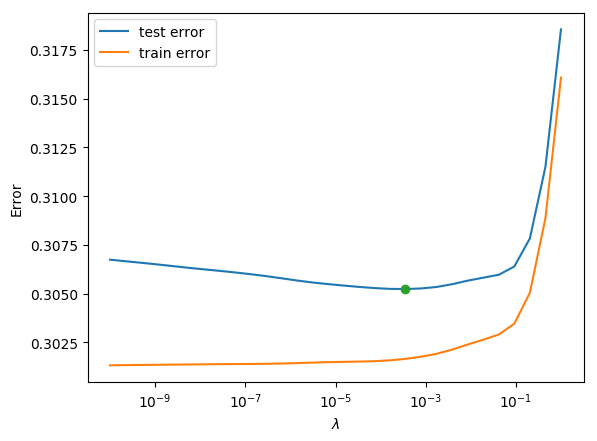

In [0]:
# Number of samples
num = 1000 
# error
err = 0.3
# Random number generator seed
seed = 12345
# Degree of polynomial regression
degree = 5

# Set random seed
if seed != -1:
  np.random.seed(seed)

# Simulate the data
X = np.random.uniform(0,2*np.pi, (num,1))
Y = np.sin(X) + err*np.random.normal(0,1,(num,1))

np.random.seed()
X, Y = shuffle(X,Y)

# We define the steps of the pipeline 
steps = [('Transfor_X_to_Powers', PolynomialFeatures(degree = 30)),('scaler', StandardScaler()), 
           ('Ridge', Ridge(fit_intercept=True))]

# Pipeline is defined
pipeline = Pipeline(steps)


# Grid of hyperparams
parameteres = {'Ridge__alpha': np.logspace(-10,0,30)}

# Grid search is defined. Here we do 10-fold cv
grid = GridSearchCV(pipeline, param_grid=parameteres, cv=10, verbose = 0, refit=True, scoring= 'neg_mean_squared_error',
                   return_train_score = True)

# We use the grid as if it was a model
grid.fit(X,Y);

# We plot the score bor both train and test
plt.plot(np.logspace(-10,0,30), np.sqrt(-grid.cv_results_['mean_test_score']), label = 'test error')
plt.plot(np.logspace(-10,0,30), np.sqrt(-grid.cv_results_['mean_train_score']), label = 'train error')

# We plot the best model
plt.plot(grid.best_params_['Ridge__alpha'], np.sqrt(-grid.best_score_),'o')

plt.xlabel(r'$\lambda$')
plt.ylabel('Error')

plt.xscale('log')

plt.legend();

#plt.ylim(0.2, 0.35); 


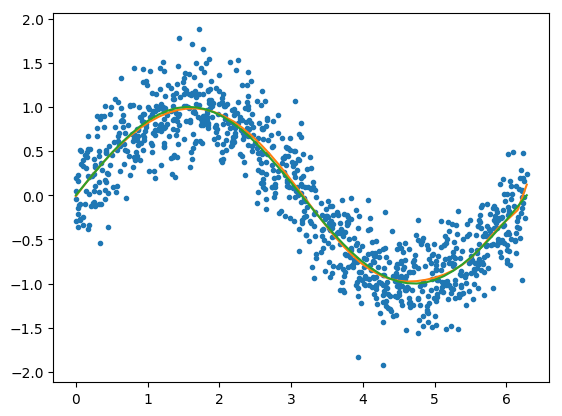

In [0]:
plt.plot(X,Y, '.')
plt.plot(X_grid, grid.predict(X_grid));
plt.plot(X_grid, np.sin(X_grid));


# Financial application: Longstaff Schwarz

The [Longstaff - Schwartz](https://people.math.ethz.ch/~hjfurrer/teaching/LongstaffSchwartzAmericanOptionsLeastSquareMonteCarlo.pdf) technique is a method to value early exercise options (american / bermudan options) for high dimensional problems.

In low dimensions (1-2) trees or numerical solution of partial differential equations are used, but these are computationally prohibitive for higher dimensions, where the Montecarlo technique is used. The problem with the Montecarlo technique and early exercise options lies in the fact that the continuation value (value of the derivative conditional on not exercising the option) is unkown.

Under the Longstaff - Schwartz method, for each option date (backwards) the continuation  value is estimated with the help of a linear regression model. For this model:

* $Y_T$ is comprised of the present value of the future cash flows (cash flows after $T$) for each simulation.
* $X_T$ is comprised of different magnitudes at time $T$ (swap rates, spot prices, model processes).

The regression-based continuation value is used to determine if the option is exercise on that particular option date and the cashflows are corrected accordingly.


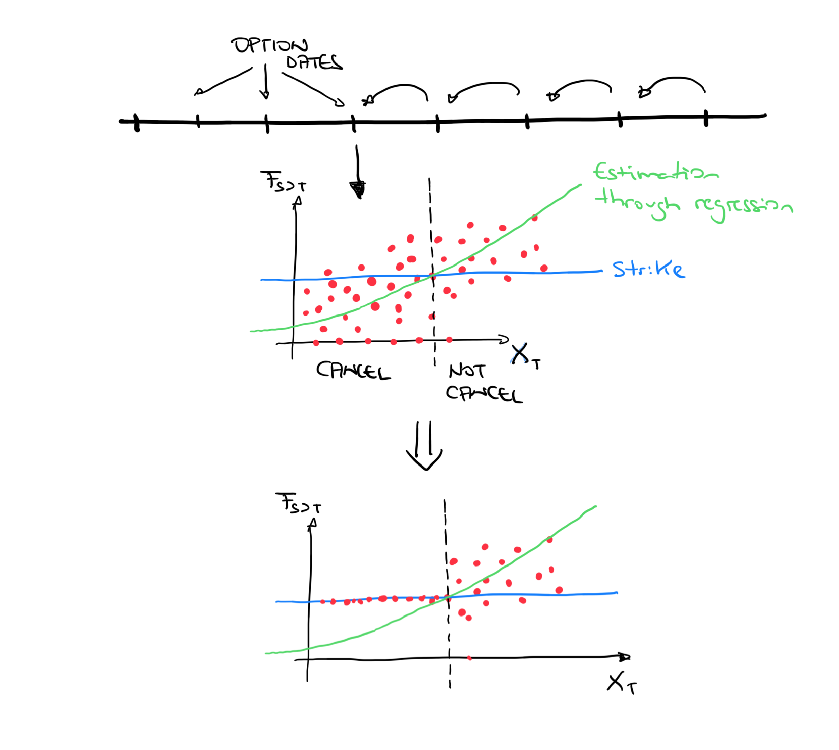

In [0]:
#@title Longstaff-Schwartz
plot_image(PATH+'Longstaff.PNG', 10,10)

Although it was designed to be used in high dimensions, we will use it in a one dimensional problem where we use a high order polynomial regression with regularization. We will perform cross validation to find the best hyper parameter $\lambda$ (regularization parameter).

We simulate the spot.

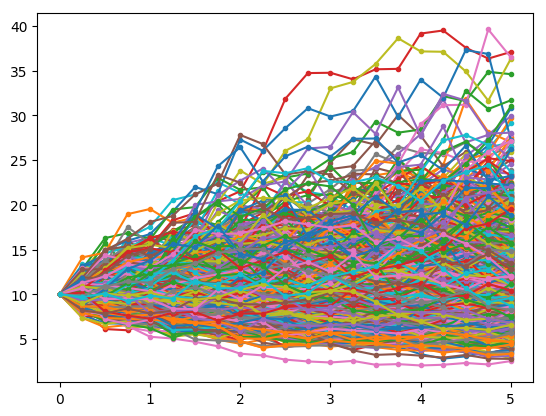

In [0]:
# Simulation of spot

rfr = 0.03 # Risk free rate
div = 0.0 # Dividends

vol = 0.2 # Volatility
spot = 10 # Spot t=0

opt_times = np.linspace(0.25,5,20, True) # Option times

sims_train = 20000 # Sims used to train

sims_test = 20000 # Sims used to value the product

# We will simulate the spot on every option date.
# We compute the time length for every interval
delta_T = np.diff(np.array([0] + list(opt_times)), n = 1)

# We simulate the brownian paths
W = np.random.normal(0,1,(sims_train + sims_test, len(opt_times)))* np.sqrt(delta_T)

# We compute the log normal returns
returns = np.exp((rfr-0.5*vol*vol-div)*delta_T + vol* W)


S = np.concatenate((spot*np.ones((sims_train  + sims_test,1)),returns), axis = 1)
S = np.cumprod(S, axis = 1)

# We plot the first 1000 paths
plt.plot(np.concatenate(([0], opt_times)), S[0:1000,:].T, '.-');

In [0]:
def FitOptDate(rfr, S_train, Payoff_train, opt_times, opt_index, payoff_functor, polin_order, ridge_params):

  # rfr: risk free rate
  # S_train: spot price matrix (rows: paths, cols: option dates + spot date).
  # Payoff_train: payoff matrix (rows: paths, cols: option dates)
  # opt_times: array of time of option dates
  # opt_index: index of option to solve
  # payoff_functor: payoff functor
  # polin_order: degree of polynomial regression
  # ridge_params: grid of ridge params
  

  print('Fitting option date ' + str(opt_index))
  
  # We compute the discount factor from the option date being considered 
  # to future option dates
  disc_factor = np.exp(-rfr*(opt_times[opt_index+1:]-opt_times[opt_index]))

  # We compute Y: sum of future discounted cash flows
  Y = np.sum(Payoff_train[:,opt_index+1:]*disc_factor, axis = 1)

  # pipeline steps
  steps = [('Transfor_X_to_Powers', PolynomialFeatures(degree = polin_order)),('scaler', StandardScaler()), 
           ('Ridge', Ridge(fit_intercept=True, max_iter=500))]

  pipeline = Pipeline(steps)

  parameteres = {'Ridge__alpha':ridge_params}

  # 10 fold cv
  grid = GridSearchCV(pipeline, param_grid=parameteres, cv=10, verbose = 0, refit=True)
  
  # We compute instrinsic value
  intrinsic = payoff_functor(S_train[:,opt_index + 1])
  
  # We consider ITM paths to run the regression
  X = S_train[np.greater(intrinsic,0),opt_index + 1].reshape(-1,1)
  Y_filter = Y[np.greater(intrinsic,0)]

  # We fit the model             
  grid.fit(X, Y_filter)

  # Estimate the continuation value
  Y_pred = grid.predict(X)
  intrinsic_filter = payoff(X.reshape(-1))

  
  plt.clf()
  plt.plot(X, Y_filter, '.', markersize = 1)
  plt.plot(X[np.greater(intrinsic_filter,Y_pred)], Y_filter[np.greater(intrinsic_filter,Y_pred)], '.', markersize = 1)
  plt.plot(X, intrinsic_filter, '.', markersize = 1)
  plt.plot(X, Y_pred, '.', markersize = 1)
  plt.show()
  return grid

  

In [0]:
def Update_Payoff(S_train, Payoff_train, opt_index, payoff, regr_model):
  
  intrinsic = payoff(S_train[:,opt_index + 1])
  cont_value = regr_model.predict(S_train[:,opt_index + 1].reshape(-1,1))
  
  index_in_the_money = np.greater(intrinsic,0)
  
  index_exercise = np.logical_and(np.greater(intrinsic,0), np.greater(intrinsic,cont_value))
  
  Payoff_train[index_exercise, opt_index] = intrinsic[index_exercise]
  
  Payoff_train[index_exercise, opt_index+1:] = 0
  
  disc_factor = np.exp(-rfr*(opt_times[opt_index:]-opt_times[opt_index]))

  Y = np.sum(Payoff_train[:,opt_index:]*disc_factor, axis = 1)
  
  plt.clf()
  plt.plot(S_train[:,opt_index + 1][index_in_the_money], Y[index_in_the_money], '.', markersize=1)
  plt.show()

In [0]:
payoff = lambda S: np.maximum(10-S, 0) # Payoff

Payoff = np.zeros((S.shape[0],S.shape[1]-1))

Payoff[:,-1] = payoff(S[:,-1])

S_train = S[0:sims_train, :]

Payoff_train = Payoff[0:sims_train, :]

for i in range(len(opt_times)-2,-1,-1):

  regr_model = FitOptDate(rfr, S_train, Payoff_train, opt_times, i, payoff,10, np.logspace(-10,1,30))
  
  Update_Payoff(S_train, Payoff_train, i, payoff, regr_model)


Output hidden; open in https://colab.research.google.com to view.

# Under construction

In [0]:
factor_data = pd.read_excel(PATH + 'Datos Factores.xlsx', index_col = 'Date')

factor_data_ret = factor_data.pct_change().iloc[1:] 

In [0]:
X = factor_data_ret.loc['2014':'2018'].drop('FONDO', axis = 1)
Y = factor_data_ret.loc['2014':'2018']['FONDO']

In [0]:
alphas, coef_path, _ = lasso_path(X,Y)

NameError: ignored

In [0]:
lineObjects = plt.semilogx(alphas, coef_path.T);

plt.legend(lineObjects, list(factor_data_ret.drop('FONDO', axis = 1).columns), bbox_to_anchor=(1.04,1), loc="upper left")


In [0]:
coef_path.shape

In [0]:
#@title Default title text { run: "auto" }
year = 2019 #@param {type:"integer"}
X = factor_data_ret.loc[str(year)].drop('FONDO', axis = 1)
Y = factor_data_ret.loc[str(year)]['FONDO']

alphas, coef_path, _ = lasso_path(X,Y)

traces = []

for i in range(coef_path.shape[0]):
  
  traces = traces + [go.Scatter(
      x=alphas,
      y=coef_path[i,:],
      name = factor_data_ret.drop('FONDO', axis = 1).columns[i]
    )]

data = traces
layout = go.Layout(
    xaxis=dict(
        type='log',
        autorange=True
    ),
    yaxis=dict(
        #type='log',
        autorange=True
    )
)

enable_plotly_in_cell()
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='elevations-3d-surface')



In [0]:
#%%time

window = 260

betas = np.zeros((factor_data_ret.shape[1]-1,factor_data_ret.shape[0]-window+1))
#corrs = np.zeros((factor_data_ret.shape[1]-1,factor_data_ret.shape[0]-window))

for i in range(window, factor_data_ret.shape[0]):
  
  tscv = TimeSeriesSplit(n_splits=5)

  model = LassoCV(cv=5, verbose = 0, max_iter = 10000, random_state=1)
  
  X = factor_data_ret.iloc[i-window:i+1].drop('FONDO', axis = 1)
  Y = factor_data_ret.iloc[i-window:i+1]['FONDO']

  scaler = StandardScaler()

  X_norm = scaler.fit_transform(X)

  model.fit(X_norm,Y)

  betas[:,i] = model.coef_/scaler.scale_ 

  if i%100 == 0:
    clear_output()
    print(factor_data_ret.index[i]) 


In [0]:
plt.plot(factor_data_ret.index[-1000:],betas.T[-1000:]);

In [0]:

traces = []

for i in range(betas.shape[0]):
  
  traces = traces + [go.Scatter(
      x=factor_data_ret.index[window:],
      y=betas[i,:],
      name = factor_data_ret.drop('FONDO', axis = 1).columns[i]
    )]

  data = traces
  layout = go.Layout(
      xaxis=dict(
          #type='log',
          autorange=True
      ),
      yaxis=dict(
          #type='log',
          autorange=True
      )
  )

enable_plotly_in_cell()
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='elevations-3d-surface')


In [0]:
X.std(ddof=0)

In [0]:
model.coef_

In [0]:
zzz.keys()

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig = plt.figure()


def f(x, y):
    return np.sin(x) + np.cos(y)

x = np.linspace(0, 2 * np.pi, 120)
y = np.linspace(0, 2 * np.pi, 100).reshape(-1, 1)
# ims is a list of lists, each row is a list of artists to draw in the
# current frame; here we are just animating one artist, the image, in
# each frame
ims = []
for i in range(60):
    x += np.pi / 15.
    y += np.pi / 20.
    im = plt.imshow(f(x, y), animated=True)
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True,
                                repeat_delay=1000)

# To save the animation, use e.g.
#
# ani.save("movie.mp4")
#
# or
#
# from matplotlib.animation import FFMpegWriter
# writer = FFMpegWriter(fps=15, metadata=dict(artist='Me'), bitrate=1800)
# ani.save("movie.mp4", writer=writer)

plt.show()

In [0]:
HTML(ani.to_jshtml())

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig, ax = plt.subplots(1)

x = np.linspace(0, 2 * np.pi, 120)

# ims is a list of lists, each row is a list of artists to draw in the
# current frame; here we are just animating one artist, the image, in
# each frame
ims = []
for i in range(60):
  
    y = np.sin(x + i*2*np.pi/59)
    z = np.cos(x + i*2*np.pi/59)
    
    axx, = ax.plot(x, z, 'blue',  animated=True, label = 'lala')

    axx2, = ax.plot(x, y, 'red',  animated=True, label = 'lele')
    
    ley = ax.legend(loc='upper right')
    
    
    
    ims.append([axx, axx2, ley])
    plt.show()

ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True,
                                repeat_delay=1000)

# To save the animation, use e.g.
#
# ani.save("movie.mp4")
#
# or
#
# from matplotlib.animation import FFMpegWriter
# writer = FFMpegWriter(fps=15, metadata=dict(artist='Me'), bitrate=1800)
# ani.save("movie.mp4", writer=writer)

plt.show()

In [0]:
HTML(ani.to_jshtml())

In [0]:
import Options

plt.plot(S_train[:,opt_index + 1], Y, '.')

plt.plot(S_train[:,opt_index + 1], grid.predict(S_train[:,opt_index + 1]), '.', markersize=1)

plt.plot(S_train[:,opt_index + 1], Options.BlackScholes(S_train[:,opt_index + 1], 10, 1,0.01, 0.03, 0.2, 0), '.', markersize=1)

plt.plot(S_train[:,opt_index + 1], payoff(S_train[:,opt_index + 1]), '.', markersize=1)




In [0]:
grid.best_params_

In [0]:
from keras.models import Sequential
from keras.optimizers import Adam
from keras.initializers import glorot_uniform

model = Sequential()

adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)


glorot = glorot_uniform(seed=None)


Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.


In [0]:


from keras.layers import Dense

model.add(Dense(units=1024, activation='relu', input_dim=1, kernel_initializer=glorot, bias_initializer='zeros'))

model.add(Dense(units=1, activation='linear', kernel_initializer=glorot, bias_initializer='zeros'))

model.compile(loss='mean_squared_error',
              optimizer=adam,
              metrics=['accuracy'])





In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1024)              2048      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 1025      
Total params: 3,073
Trainable params: 3,073
Non-trainable params: 0
_________________________________________________________________


In [0]:
opt_index= 19


model.fit(S_train[:,opt_index + 1], Y, epochs=20, batch_size=32 )

ValueError: ignored

In [0]:
Y_Pred = model.predict(S_train[:,opt_index + 1])

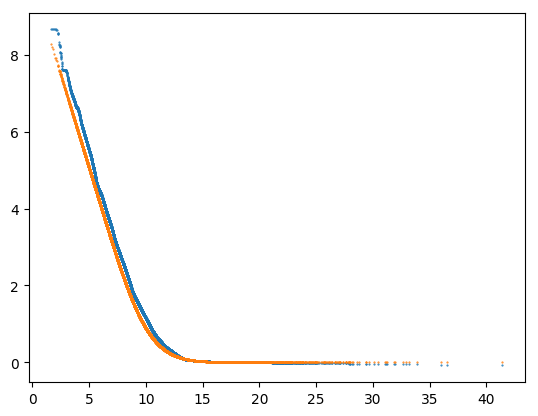

In [0]:
plt.plot(S_train[:,opt_index + 1], Y_Pred, '.',markersize=1)


plt.plot(S_train[:,opt_index + 1], Options.BlackScholes(S_train[:,opt_index + 1], 10, 1,0.01, 0.03, 0.2, 0), '.', markersize=1)


#plt.plot(S_train[:,opt_index + 1], payoff(S_train[:,opt_index + 1]), '.', markersize=1)

#plt.plot(S_train[:,opt_index + 1], grid.predict(S_train[:,opt_index + 1]), '.', markersize=1)

# plt.xlim(6,15)

# plt.ylim(-1,4)

# plt.xlim([5,15])
# plt.ylim([-0.1,4])


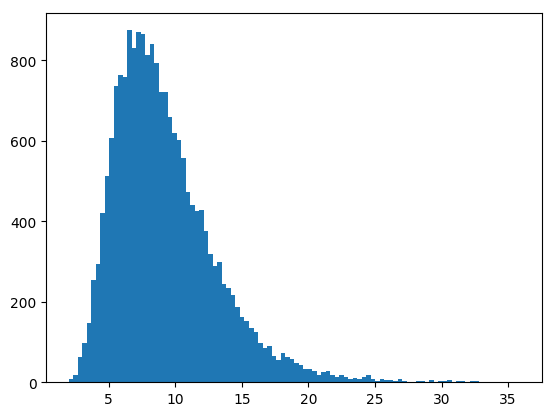

In [0]:
plt.hist(S_train[:,opt_index + 1], bins = 100);

In [0]:
np.mean(Payoff_train[:,-1])*np.exp(-0.01*7)

2.492074690557064

In [0]:
np.std(Payoff_train[:,-1])/np.sqrt(20000)

0.01716894958599414

In [0]:
import Options

Options.BlackScholes(10,10,7,0.01,0.03,0.2,False)

2.4892143351644913

In [0]:
import numpy as np
from scipy.stats import norm        # Para disponer de los momentos de la distr. normal

N = norm.cdf                        # Definimos función N como f. distr normal

def BlackScholes(Spot, Strike, TTM, rate, dividends, Vol, IsCall):
    if TTM > 0:

        d1 = (np.log(Spot / Strike) + (rate - dividends + Vol * Vol / 2) * TTM) / (Vol * np.sqrt(TTM))
        d2 = (np.log(Spot / Strike) + (rate - dividends - Vol * Vol / 2) * TTM) / (Vol * np.sqrt(TTM))
        
        print(N(d2))

        if IsCall:

            return Spot *np.exp(-dividends * TTM)* N(d1) - Strike * np.exp(-rate * TTM) * N(d2)

        else:

            return -Spot *np.exp(-dividends * TTM)* N(-d1) + Strike * np.exp(-rate * TTM) * N(-d2)

    else:

        if IsCall:

            return np.maximum(Spot - Strike, 0)

        else:

            return np.maximum(-Spot + Strike, 0)


In [0]:
BlackScholes(10,10,7,0.01,0.03,0.2,False)

0.29835060836467814


2.4892143351644913

In [0]:
N(-10)

7.61985302416047e-24

In [0]:
!pip install celluloid;

clear_output()

MovieWriter imagemagick unavailable. Trying to use pillow instead.


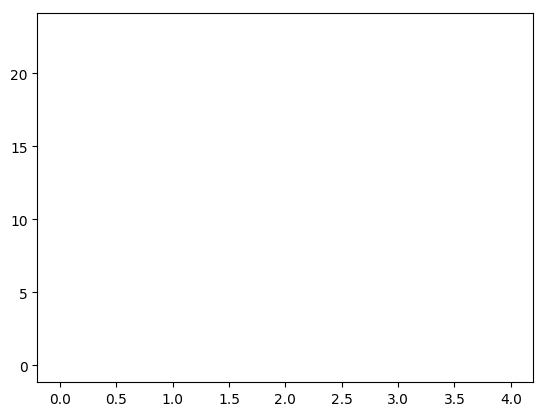

In [0]:
from celluloid import Camera

fig = plt.figure()
camera = Camera(fig)
for i in range(20):
    t = plt.plot(range(i, i + 5))
    plt.legend(t, [f'line {i}'])
    camera.snap()
animation = camera.animate()


In [0]:
HTML(animation.to_jshtml())

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig, ax = plt.subplots(1)

x = np.linspace(0, 2 * np.pi, 120)

# ims is a list of lists, each row is a list of artists to draw in the
# current frame; here we are just animating one artist, the image, in
# each frame
ims = []
for i in range(60):
  
    y = np.sin(x + i*2*np.pi/59)
    z = np.cos(x + i*2*np.pi/59)
    
    axx, = ax.plot(x, z, 'blue',  animated=True, label = 'lala')

    axx2, = ax.plot(x, y, 'red',  animated=True, label = 'lele')
    
    ley = ax.legend(loc='upper right')
    
    
    
    ims.append([axx, axx2, ley])
    plt.show()

ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True,
                                repeat_delay=1000)
